In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
path='/content/drive/MyDrive/BONE_DATASET/DATASET'

In [ ]:
path_lst=[]
label_lst=[]
for i in os.listdir(path):
    for j in os.listdir(os.path.join(path, i)):
        path_lst.append(os.path.join(path, i, j))
        label_lst.append(i)


In [ ]:
len(path_lst),len(label_lst)

(1255, 1255)

In [ ]:
df=pd.DataFrame({'Path':path_lst,
                'Labels':label_lst})
df.shape

(1255, 2)

In [ ]:
df.head()

,Path,Labels
0,/content/drive/MyDrive/BONE_DATASET/DATASET/CA...,CANCER
1,/content/drive/MyDrive/BONE_DATASET/DATASET/CA...,CANCER
2,/content/drive/MyDrive/BONE_DATASET/DATASET/CA...,CANCER
3,/content/drive/MyDrive/BONE_DATASET/DATASET/CA...,CANCER
4,/content/drive/MyDrive/BONE_DATASET/DATASET/CA...,CANCER


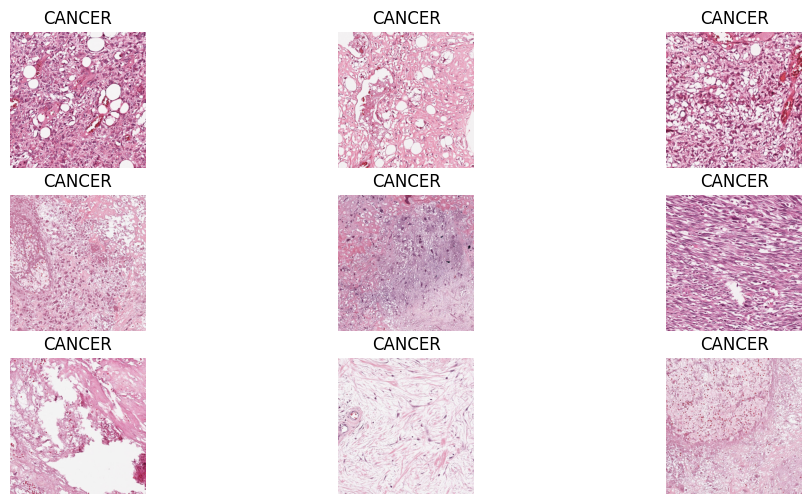

In [ ]:
import cv2
c=0
plt.figure(figsize=(12, 6))
for i in range(1,10):
    plt.subplot(3, 3, c + 1)
    image = cv2.imread(path_lst[i])
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(label_lst[i])
    plt.axis('off')
    c+=1
plt.show()


<ipython-input-10-686a3ba742e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Labels', data=df, palette='bright')


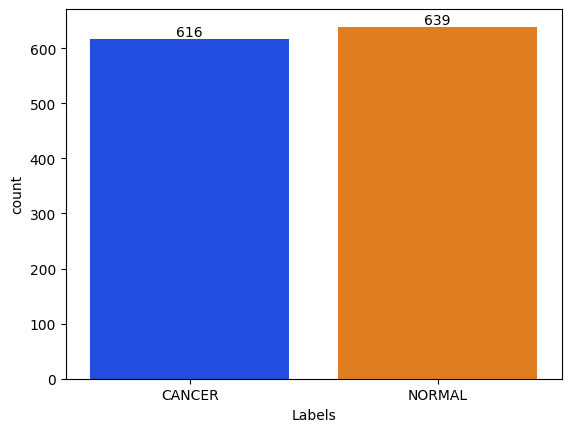

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x='Labels', data=df, palette='bright')

for container in ax.containers:
    ax.bar_label(container, fontsize=10, color='black')

plt.show()


In [ ]:
import cv2
x = []
y = []
new_width = 256
new_height = 256
total_rows = len(df)
for ind, row in df.iterrows():
    try:
        image = cv2.imread(row['Path'])
        resized_image = cv2.resize(image, (new_width, new_height))
        image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
        x.append(image_rgb)
        y.append(row['Labels'])
        if (ind + 1) % 100 == 0:
            print(f"Processed {ind + 1} images.")
    except Exception as e:
        print(f"Error processing row {ind + 1}: {e}")
print(f"Total processed images: {len(x)}")


Processed 100 images.
Processed 200 images.
Processed 300 images.
Processed 400 images.
Processed 500 images.
Processed 600 images.
Processed 700 images.
Processed 800 images.
Processed 900 images.
Processed 1000 images.
Processed 1100 images.
Processed 1200 images.
Total processed images: 1255


In [ ]:
x[0].shape

(256, 256, 3)

In [ ]:
x = np.array(x, dtype=np.float32) / 255.0

In [ ]:
from sklearn.preprocessing import OneHotEncoder
y = np.array(y)
y_reshaped = y.reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(y_reshaped)

print(encoded)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same',
                 activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))


model.compile(optimizer='adam',
               loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             5

 Total params: 16,918,818 (64.54 MB)

 Trainable params: 16,917,922 (64.54 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,encoded,test_size=0.2,random_state=42,stratify=encoded)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(1004, 251, 1004, 251)

In [ ]:
hist=model.fit(X_train, y_train, batch_size=16,epochs=20)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 187ms/step - accuracy: 0.8502 - loss: 0.4362
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9358 - loss: 0.1320
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9432 - loss: 0.1395
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9866 - loss: 0.0530
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9668 - loss: 0.0794
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9746 - loss: 0.0623
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9702 - loss: 0.0797
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9717 - loss: 0.0605
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9458 - loss: 0.1492
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9773 - loss: 0.0765
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9886 - loss: 0.0376
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - ac

In [ ]:
model.save('/content/drive/MyDrive/BONE_CANCER_MICRO_GPT_NEW.h5')

In [ ]:
pred=model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 603ms/step


In [ ]:
pred_val=[]
for i in pred:
    pred_val.append(np.argmax(i))

In [ ]:
org_y=[]
for i in y_test:
    org_y.append(np.argmax(i))

In [ ]:
result_df_=pd.DataFrame(confusion_matrix(pred_val,org_y),columns=['CANCER','NORMAL'])

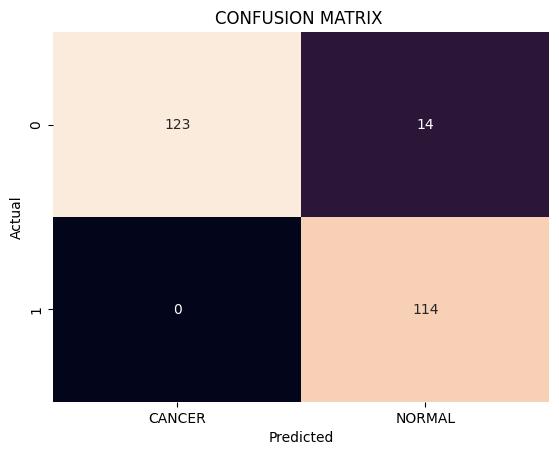

In [ ]:
sns.heatmap(result_df_,annot=True,cbar=False,fmt='g')
plt.title('CONFUSION MATRIX ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(pred_val,org_y)}")

Accuracy: 0.9442231075697212


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(pred_val,org_y)
recall = recall_score(pred_val,org_y)
f1 = f1_score(pred_val,org_y)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.8906
Recall: 1.0000
F1 Score: 0.9421


**PREDICTION**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

def preprocess_image(image_path, target_size=(256, 256)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(model, image_path):
    processed_image = preprocess_image(image_path)
    prediction = model.predict(processed_image)
    return prediction


model = tf.keras.models.load_model('/content/drive/MyDrive/BONE_CANCER_MICRO_GPT_NEW.h5')
image_path = '/content/drive/MyDrive/Certificate/SQL.png'
prediction = predict_image(model, image_path)
print("Prediction:", prediction)
print(prediction[0][0])
if prediction[0][0] > 0.5:
    print("CANCER")
else:
    print("NORMAL")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
Prediction: [[9.9978870e-01 2.1127146e-04]]
0.9997887
CANCER
